In [15]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spark = SparkSession.builder.appName('MySparkApp').getOrCreate()

In [3]:
movies_df = spark.read.csv('rotten_tomatoes_movies.csv', header=True, inferSchema=True)
movies_df.show()

+--------------------+--------------------+-------------+-----------+------+--------------------+-------------------+--------------------+--------------+--------------------+----------------+--------------------+--------------------+---------+-----------------+--------+
|                  id|               title|audienceScore|tomatoMeter|rating|      ratingContents|releaseDateTheaters|releaseDateStreaming|runtimeMinutes|               genre|originalLanguage|            director|              writer|boxOffice|      distributor|soundMix|
+--------------------+--------------------+-------------+-----------+------+--------------------+-------------------+--------------------+--------------+--------------------+----------------+--------------------+--------------------+---------+-----------------+--------+
|  space-zombie-bingo| Space Zombie Bingo!|           50|       NULL|  NULL|                NULL|               NULL|          2018-08-25|            75|Comedy, Horror, S...|         Engl

In [4]:
movies_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- audienceScore: integer (nullable = true)
 |-- tomatoMeter: integer (nullable = true)
 |-- rating: string (nullable = true)
 |-- ratingContents: string (nullable = true)
 |-- releaseDateTheaters: date (nullable = true)
 |-- releaseDateStreaming: string (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genre: string (nullable = true)
 |-- originalLanguage: string (nullable = true)
 |-- director: string (nullable = true)
 |-- writer: string (nullable = true)
 |-- boxOffice: string (nullable = true)
 |-- distributor: string (nullable = true)
 |-- soundMix: string (nullable = true)



In [5]:
movies_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in movies_df.columns]).show()

+---+-----+-------------+-----------+------+--------------+-------------------+--------------------+--------------+-----+----------------+--------+------+---------+-----------+--------+
| id|title|audienceScore|tomatoMeter|rating|ratingContents|releaseDateTheaters|releaseDateStreaming|runtimeMinutes|genre|originalLanguage|director|writer|boxOffice|distributor|soundMix|
+---+-----+-------------+-----------+------+--------------+-------------------+--------------------+--------------+-----+----------------+--------+------+---------+-----------+--------+
|  0|  367|        70010|     109381|129267|        129267|             112485|               63838|         13827|11083|           13858|    4194| 53142|   128491|     120248|  127333|
+---+-----+-------------+-----------+------+--------------+-------------------+--------------------+--------------+-----+----------------+--------+------+---------+-----------+--------+



In [6]:
movies_df = movies_df.na.drop(subset=['audienceScore', 'tomatoMeter', 'releaseDateTheaters'])

In [7]:
movies_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in movies_df.columns]).show()

+---+-----+-------------+-----------+------+--------------+-------------------+--------------------+--------------+-----+----------------+--------+------+---------+-----------+--------+
| id|title|audienceScore|tomatoMeter|rating|ratingContents|releaseDateTheaters|releaseDateStreaming|runtimeMinutes|genre|originalLanguage|director|writer|boxOffice|distributor|soundMix|
+---+-----+-------------+-----------+------+--------------+-------------------+--------------------+--------------+-----+----------------+--------+------+---------+-----------+--------+
|  0|    0|            0|          0| 10975|         10975|                  0|                1071|            28|    2|             129|      28|  2567|     7797|       2158|   11187|
+---+-----+-------------+-----------+------+--------------+-------------------+--------------------+--------------+-----+----------------+--------+------+---------+-----------+--------+



In [9]:
movies_df = movies_df.withColumn('year', F.year(movies_df.releaseDateTheaters))
movies_df.select('year').show()

+----+
|year|
+----+
|2018|
|1947|
|2009|
|2011|
|2005|
|2017|
|1963|
|1996|
|2009|
|1991|
|2002|
|2017|
|2022|
|2015|
|1993|
|2012|
|2019|
|2017|
|2014|
|2004|
+----+
only showing top 20 rows



In [10]:
movies_df = movies_df.orderBy(F.desc('tomatoMeter'), F.asc('title')).limit(5000)
movies_df.select(['tomatoMeter', 'title']).show()

+-----------+--------------------+
|tomatoMeter|               title|
+-----------+--------------------+
|        100|"J.R. ""Bob"" Dob...|
|        100|                 '96|
|        100|100 Years of Men ...|
|        100|               11:55|
|        100|        12 Angry Men|
|        100|            16 Acres|
|        100|2022 Oscar Nomina...|
|        100|                2LDK|
|        100|                  36|
|        100|      4 Little Girls|
|        100|             5-25-77|
|        100|                  5B|
|        100|             76 Days|
|        100|     99 River Street|
|        100|  A Beautiful Planet|
|        100|     A Bigger Splash|
|        100|    A Brother's Kiss|
|        100|   A Christmas Carol|
|        100|   A City of Sadness|
|        100|A Crime on the Bayou|
+-----------+--------------------+
only showing top 20 rows



In [13]:
movies_df.write.parquet('cleaned_df.parquet')

In [17]:
movies_df = pd.read_parquet('cleaned_df.parquet')
movies_df.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,year
0,jr_bob_dobbs_and_the_church_of_the_subgenius,"""J.R. """"Bob"""" Dobbs & The Church of the SubGen...",36,100,None,None,2020-10-16,2020-10-20,80.0,"Documentary, Comedy",English,Sandy K. Boone,"Sandy K. Boone,Jason Wehling",None,Dark Star Pictures,None,2020
1,96,'96,89,100,None,None,2018-10-03,None,158.0,Romance,Tamil,C. Premkumar,C. Premkumar,$234.2K,None,None,2018
2,100_years_of_men_in_love,100 Years of Men in Love: The Accidental Colle...,55,100,None,None,2022-03-23,2022-03-25,57.0,"Documentary, History, Lgbtq+",English,David Millbern,David Millbern,None,Here TV,None,2022
3,1155,11:55,80,100,None,None,2017-06-09,2017-06-09,80.0,"Crime, Drama",English,"Ari Issler,Ben Snyder","Victor Almanzar,Ari Issler,Ben Snyder",None,Gravitas Ventures,None,2017
4,1000013_12_angry_men,12 Angry Men,97,100,None,None,1957-04-20,2008-03-04,95.0,Drama,English,Sidney Lumet,Reginald Rose,None,"Criterion Collection, MGM/UA Home Entertainmen...",None,1957


Text(0.5, 0.98, 'Audience Score vs Tomato Meter')

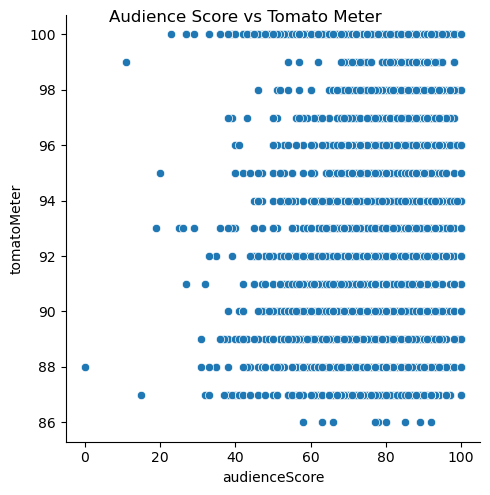

In [19]:
# Explore the relationship between audience score and Tomatometer score.

scatter_plot = sns.relplot(data=movies_df, x='audienceScore', y='tomatoMeter')
scatter_plot.fig.suptitle('Audience Score vs Tomato Meter')

In [21]:
# Analyze trends in average Tomatometer score and audience score over time (years)
avg_score_years = movies_df.groupby('year')[['audienceScore', 'tomatoMeter']].mean().reset_index()
avg_score_years.head()

,year,audienceScore,tomatoMeter
0,1902,90.000000,100.000000
1,1914,42.000000,90.000000
2,1915,56.666667,93.666667
3,1916,78.500000,93.000000
4,1919,69.000000,95.000000


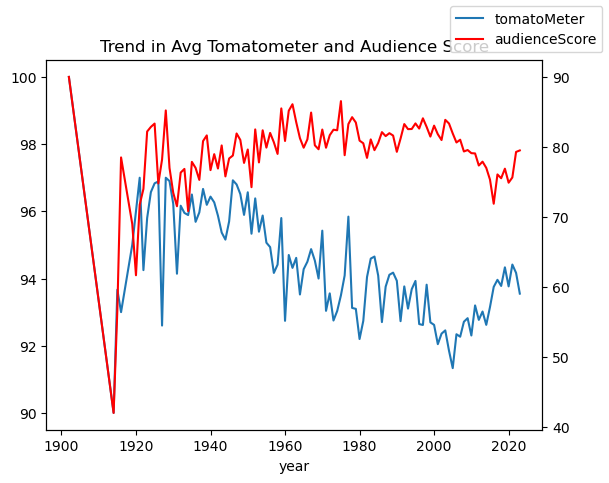

In [25]:
ax = avg_score_years.plot(x="year", y="tomatoMeter", legend=False)
ax2 = ax.twinx()
avg_score_years.plot(x="year", y="audienceScore", ax=ax2, legend=False, color="r").set(title='Trend in Avg Tomatometer and Audience Score')
ax.figure.legend()

In [27]:
# Compare average audience score to the average Tomatometer score, grouped by original language 
# Only show the languages 'Arabic', 'Yiddish', 'English', 'Chinese', ‘French’, and 'Spanish'

lang_score = movies_df.groupby('originalLanguage')[['audienceScore', 'tomatoMeter']].mean().reset_index()
lang_score = lang_score.loc[lang_score.originalLanguage.isin(['Arabic', 'Yiddish', 'English', 'Chinese', 'Spanish', 'French'])]
lang_score

,originalLanguage,audienceScore,tomatoMeter
2,Arabic,81.021277,93.893617
9,Chinese,79.402062,93.917526
15,English,78.606246,93.734092
21,French,92.000000,94.000000
61,Spanish,75.722772,93.415842
76,Yiddish,64.500000,97.500000


In [28]:
score_by_language = pd.melt(
    lang_score, id_vars=['originalLanguage'], value_vars=['tomatoMeter', 'audienceScore'], var_name='scoreType', value_name='score')
score_by_language

,originalLanguage,scoreType,score
0,Arabic,tomatoMeter,93.893617
1,Chinese,tomatoMeter,93.917526
2,English,tomatoMeter,93.734092
3,French,tomatoMeter,94.000000
4,Spanish,tomatoMeter,93.415842
5,Yiddish,tomatoMeter,97.500000
6,Arabic,audienceScore,81.021277
7,Chinese,audienceScore,79.402062
8,English,audienceScore,78.606246
9,French,audienceScore,92.000000


[Text(0.5, 1.0, 'Score by Language'),
 Text(0, 0.5, 'Score'),
 Text(0.5, 0, 'Original Language')]

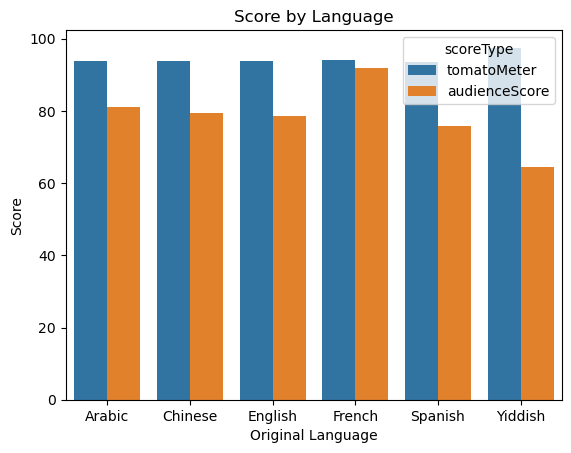

In [30]:
sns.barplot(data=score_by_language, y='score', x='originalLanguage', hue='scoreType').set(
    title='Score by Language', ylabel='Score', xlabel='Original Language')